In [23]:
import rasterio

In [4]:
import numpy as np

In [2]:
import richdem as rd

In [9]:
import tifffile as tiff

In [16]:
from shapely.geometry import shape

In [13]:
import geopandas as gpd

In [6]:
import matplotlib.pyplot as plt

<tifffile.TiffPage 0 @5768414> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')


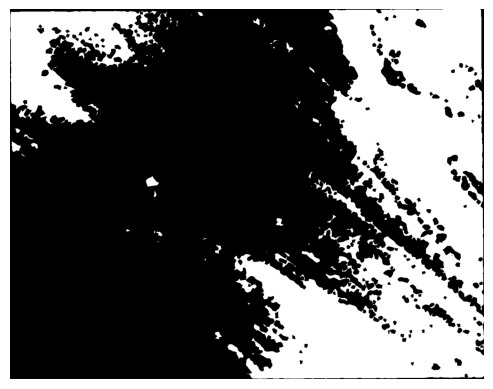

In [10]:
image = tiff.imread('images/rawraster3.tif')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [24]:
with rasterio.open('images/rawraster3.tif') as dataset:
    elevation = dataset.read(1)

In [25]:
import matplotlib.pyplot as plt

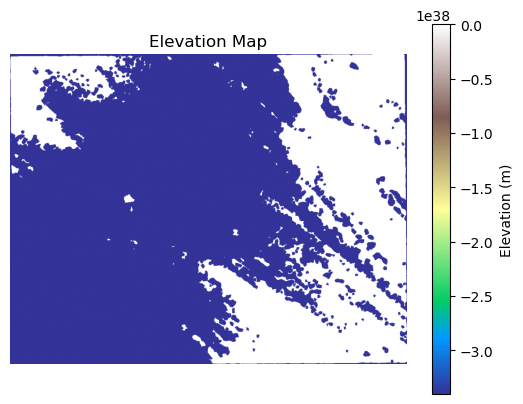

In [26]:
# Now 'elevation' is a 2D NumPy array containing the elevation values
plt.imshow(elevation, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map')
plt.axis('off')
plt.show()

In [27]:
threshold = 20
mask = elevation > threshold

In [28]:
from rasterio import features

In [29]:
with rasterio.open('images/rawraster3.tif') as src:
    elevation = src.read(1)
    transform = src.transform
    crs = src.crs

In [30]:
shapes = features.shapes(mask.astype('uint8'), transform=transform)

In [31]:
shapes = features.shapes(mask.astype('uint8'), transform=transform)

In [32]:
geoms = []
for geom, value in shapes:
    if value == 1:  # only keep areas above threshold
        geoms.append(shape(geom))

gdf = gpd.GeoDataFrame(geometry=geoms, crs=crs)

In [36]:
gdf.to_file('elevation_above_20m2.geojson', driver='GeoJSON')

print("GeoJSON saved as elevation_above_20m2.geojson")

GeoJSON saved as elevation_above_20m2.geojson


In [24]:
    # Read the shapefile using geopandas
    gdf = gpd.read_file('tileindex_USACE_CA_Topobathy_DEM_2015.shp')

In [26]:
    # Convert the geodataframe to a GeoJSON file
    gdf.to_file('output_geojson_path', driver='GeoJSON')

In [31]:
gdf = gpd.read_file('output_geojson_path')

KeyError: 'mean_slope_deg'

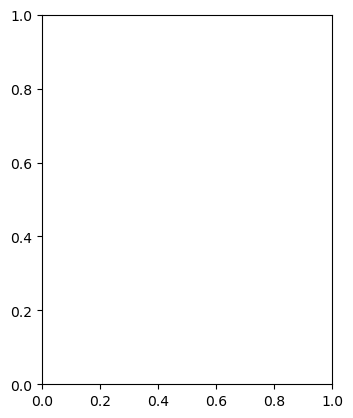

In [ ]:
gdf.plot(column='mean_slope_deg', cmap='', legend=True)